### Description: Test the performance of Gauss-Legendre vs Clenshaw-Curtis quadrature in computing the following integral:
$$  \int_{-1}^1 \exp(-1/x^2) = 0.178148 $$
#### Additional packages required: [UQTk](www.sandia.gov)

###### Author: Rimple Sandhu, Carleton University; Email: rimple_sandhu@outlook.com

In [15]:
#!/usr/bin/python
from numpy import *
import matplotlib.pyplot as plt
import os
import math
import sys

Define the function that needs to be integrated:

In [16]:
def f(x):
    return exp(-1/(x**2))
ExactInt = 0.178148
Lbl = r'$f(x) = \exp(-1/x^2)$'

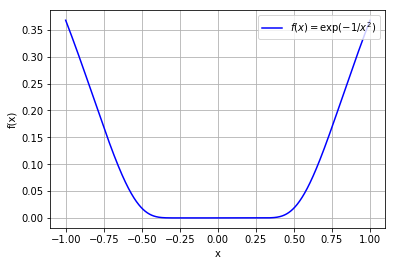

In [17]:
Xp = linspace(-1,1,1000)
Fp = f(Xp)
Msize = 5
fig = plt.figure(1)
plt.plot(Xp,Fp,'b-', label=Lbl)
plt.grid(True)
plt.legend(loc='upper right', numpoints = 1)
plt.xlabel('x')
plt.ylabel('f(x)');
fig.savefig('GQ1D_LUvsCC_2_f.pdf',bbox_inches='tight')

Compare LU and CC performance:

/home/rimple/Softwares/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


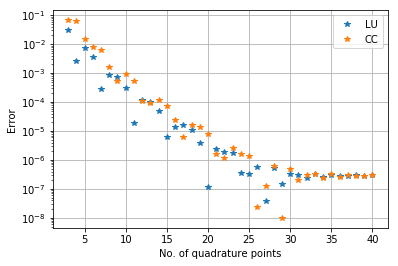

In [18]:
Qdim = 1
QtypeList=['LU','CC']
QMaxLevel = 40
Qstype ='full'
fig = plt.figure(2)
for Qtype in QtypeList:
    LvlVec = zeros(QMaxLevel-2)
    ErrVec = zeros(QMaxLevel-2)
    j=0
    for i in range(3,QMaxLevel+1):
        CMD = 'generate_quad -g '+Qtype+' -p '+str(i)+' -d '+str(Qdim)+' -x '+Qstype
        os.system(CMD)
        Qpts = loadtxt('qdpts.dat')
        Qwgt = loadtxt('wghts.dat')
        Fqpts = f(Qpts)
        NumInt =2*sum([a*b for a,b in zip(Qwgt,Fqpts)])
        LvlVec[j] = i
        ErrInt = abs(NumInt - ExactInt)
        ErrVec[j] = ErrInt
        #print(i, ErrInt, j)
        j = j+1
    plt.plot(LvlVec,ErrVec, '*',label=Qtype)
plt.yscale('log')
plt.grid(True)
plt.legend(loc='upper right', numpoints = 1)
plt.xlabel('No. of quadrature points')
plt.ylabel('Error');

In [19]:
fig.savefig('GQ1D_LUvsCC_2_comp.pdf',bbox_inches='tight')